In [976]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [977]:
#Read the training and testing data. 
train_data = pd.read_csv('/Users/arjunanandapadmanabhan/Downloads/titanic/train.csv')
train_data.shape

(891, 12)

In [978]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [979]:
titanic = pd.read_csv('/Users/arjunanandapadmanabhan/Downloads/titanic/test.csv')
titanic.shape

(418, 11)

In [980]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [981]:
#Dropping the unnecsessary columns which is not required for training the model. 
train_data = train_data.drop(['Name', 'PassengerId', 'SibSp', 'Ticket', 'Parch', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [982]:
train_data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [983]:
#Coverting categoirical data into labels. Male = 0 and Female = 1
conditions = [
    (train_data['Sex'] == 'male'),
    (train_data['Sex'] == 'female')
     ]
values = [0, 1]

train_data['Sex']= np.select(conditions, values)

In [984]:
train_data.head()

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [985]:
train_data.isna().value_counts()

Survived  Pclass  Sex    Age  
False     False   False  False    714
                         True     177
dtype: int64

There are 177 NA/missing values in 'Age' column. I will be dropping the NaN values in the dataset before trainin the model. 

In [986]:
#Dropping NAN values in the dataset. 
train_data = train_data.dropna(axis=0)

In [987]:
train_data.isna().value_counts()

Survived  Pclass  Sex    Age  
False     False   False  False    714
dtype: int64

#  Exploratory Data Analysis

In [988]:
stat = train_data.Age.describe()
stat

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The total number of rows in the dataset after dropping NANs are 714. The mean value of Age is 29.6 and maximum age is 80. 

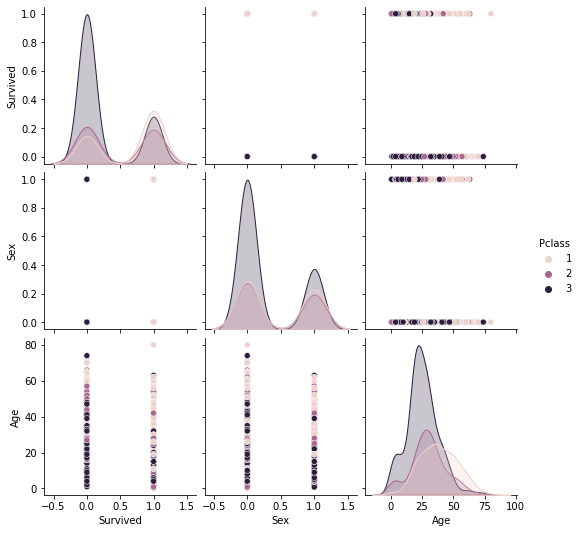

In [989]:
g = sns.pairplot(train_data, hue='Pclass')

There are more males than females in the dataset. The maximum age of male in the dataset is 80 whereas the maximum age of female in the dataset is around 60. 

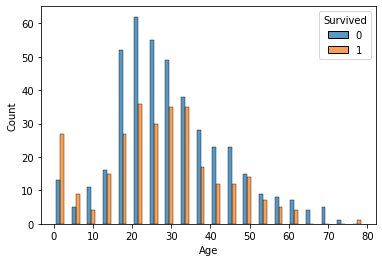

In [990]:
g = sns.histplot(x=train_data['Age'], hue=train_data['Survived'], multiple="dodge", shrink=.5)

AS we can observe from the above graph, the maximum number of people who have not survived the disaster was in the age group 15-45. Most of the infants and those above the age of 75 have been rescued. 

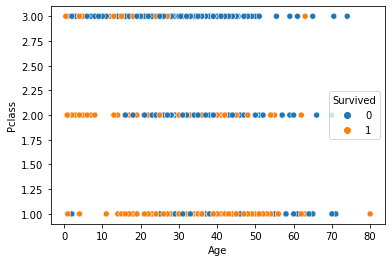

In [991]:
g = sns.scatterplot(x=train_data['Age'], y=train_data['Pclass'], hue=train_data['Survived'])

The maximum number of survivors are in First class and minimum number of survivors are in third class. 

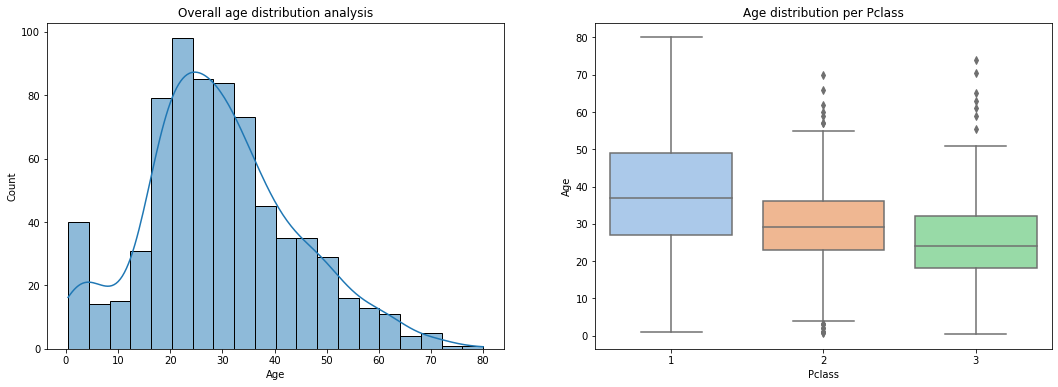

In [992]:
fig, ax = plt.subplots(1,2,figsize = (18,6));
sns.histplot(x = train_data['Age'], kde= True, palette = 'Blues', ax = ax[0]);
ax[0].set_title(f"Overall age distribution analysis", fontsize= 12 )

sns.boxplot(x = train_data['Pclass'], y = train_data['Age'], palette = 'pastel', ax = ax[1]);
ax[1].set_title(f"Age distribution per Pclass", fontsize= 12);

plt.show();

The mean age of people in first class is around 35, second class is around 30 and third class is around 25. There are many outliers in second and third class as compared to first class. 

# Training the data

In [993]:
train_data['Pclass'].value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

There are more people in the third class than in First class and second class. Therefore, we will be using a stratified split to maintain the ration in train and test set. 

In [994]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(train_data, train_data['Pclass']):
    titanic_train_set = train_data.loc[train_data.index.intersection(train_index)]
    titanic_test_set = train_data.loc[train_data.index.intersection(test_index)]
titanic_train_set.shape,titanic_test_set.shape

((462, 4), (105, 4))

In [995]:
#Creating features and labels. 
titanic_train_X = titanic_train_set.drop('Survived',axis=1)
titanic_train_y = titanic_train_set['Survived'].copy()
titanic_test_X = titanic_test_set.drop('Survived',axis=1)
titanic_test_y = titanic_test_set['Survived'].copy()

In [996]:
num_attribs = list(titanic_train_X.select_dtypes(include=[np.number]))

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
    ])

titanic_train_X_prepared = full_pipeline.fit_transform(titanic_train_X)
titanic_test_X_prepared = full_pipeline.transform(titanic_test_X)

In [997]:
X_train = titanic_train_X_prepared
y_train = titanic_train_y
X_test = titanic_test_X_prepared
y_test = titanic_test_y

# Multiple Models along with accuracy. 

In [998]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]
seed = 42

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=seed),
    SVC(gamma=2, C=1, random_state=seed),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=seed),
    DecisionTreeClassifier(max_depth=5, random_state=seed),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=seed),
    MLPClassifier(alpha=1, max_iter=1000, random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GaussianNB(),
    ]
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred3 = clf.predict(X_test)
    
    # evaluate predictions
    accuracy = clf.score(X_test, y_test)
    print("%s Accuracy: %.2f%%" % (name,accuracy * 100.0))

Nearest Neighbors Accuracy: 77.14%
Linear SVM Accuracy: 78.10%
RBF SVM Accuracy: 81.90%
Gaussian Process Accuracy: 76.19%
Decision Tree Accuracy: 77.14%
Random Forest Accuracy: 78.10%
Neural Net Accuracy: 78.10%
AdaBoost Accuracy: 79.05%
Naive Bayes Accuracy: 79.05%


According to the above table, the maximum accuracy is achieved with SVM RBF model, followed by RandomForest and Naive Bayes. Therefore, I will be training my dataset in all three models and tune the hyperparameters to check if I can achieve higher accuracy. 

# Model 1- Naive Bayes

In [999]:
model1 = GaussianNB()
model1.fit(X_train , y_train)
y_pred = model1.predict(X_test)
predictions = y_pred 

In [1000]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 79.05%
[[55  6]
 [16 28]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        61
           1       0.82      0.64      0.72        44

    accuracy                           0.79       105
   macro avg       0.80      0.77      0.78       105
weighted avg       0.80      0.79      0.78       105



# Model 2 - Random Forest

In [1001]:
seed = 42

model2 = RandomForestClassifier(
    n_estimators=10,
    random_state=seed, 
    criterion='entropy',
    max_depth=5, 
    min_samples_split=2,
    max_features=1)

model2.fit(X_train , y_train)

y_pred2 = model2.predict(X_test)

# evaluate predictions
accuracy = model2.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.05%


In [1002]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[57  4]
 [18 26]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        61
           1       0.87      0.59      0.70        44

    accuracy                           0.79       105
   macro avg       0.81      0.76      0.77       105
weighted avg       0.80      0.79      0.78       105



<AxesSubplot:>

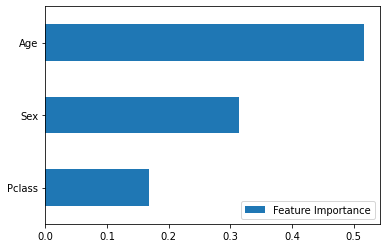

In [1003]:
# Check feature importance
feat_importance = model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=list(X)).plot(kind='barh')

The age feature is more important in the prediction. 

# Model 3- Support Vector Machine (RBF kernel)

In [1004]:
seed = 42

model3 = SVC(gamma=2, C=1, decision_function_shape='ovo')

model3.fit(X_train , y_train)

y_pred3 = model3.predict(X_test)

# evaluate predictions
accuracy = model3.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.90%


In [1005]:
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[57  4]
 [15 29]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        61
           1       0.88      0.66      0.75        44

    accuracy                           0.82       105
   macro avg       0.84      0.80      0.81       105
weighted avg       0.83      0.82      0.81       105



From the confusion matrix, we can see that there is high recall for 0 (not survived) and low recall for 1 (survived). The precision is higher for survived (1) and low for not survived(0). Since SVM has given the highest accuracy when compared to all three, I have selected Model 3 for my prediction for test dataset.

# Prediction with the test dataset. 

We will be performing the same cleaning steps that we have performed for training data. 

In [1006]:
test_data = titanic.drop(['Name', 'SibSp', 'Ticket', 'Parch', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [1007]:
conditions = [
    (test_data['Sex'] == 'male'),
    (test_data['Sex'] == 'female')
     ]
values = [0, 1]

test_data['Sex']= np.select(conditions, values)

In [1008]:
test_data.Age.describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

The mean age in test dataset is 30.2 (which is not very different from the training dataset) and the maximum age is 76 (as opposed to 80 in training dataset). 

In [1009]:
#Replacing Nan value in Age with mean. 
mean_value=test_data['Age'].mean()
test_data['Age'].fillna(value=mean_value, inplace=True)

In [1010]:
X = test_data.drop('PassengerId', 1)
X.shape

(418, 3)

In [1011]:
test_X_prepared = full_pipeline.transform(X)


In [1012]:
y_pred = model3.predict(test_X_prepared)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [1013]:
pred = pd.DataFrame(y_pred)
pred.columns = ['Survived']
len(pred)

pred.reset_index(drop=True, inplace=True)


In [1014]:
passid = pd.DataFrame(test_data['PassengerId'])
passid.reset_index(drop=True, inplace=True)

In [1015]:
fin = [test_data['PassengerId'], pred['Survived']]
headers = ["PassengerId", "Survived"]

In [1016]:
df = pd.concat([passid, pred], axis=1)

In [1017]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
